In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
datos = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv', low_memory=False
)

resultados = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv', low_memory=False
)

df = pd.merge(datos, resultados, how='left', left_on='id', right_on='id')
df

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,llovieron_hamburguesas_al_dia_siguiente
0,Retiro,2016-10-11,Este,Nornoreste,10.7,59.0,56.0,86942,no,16.0,...,1010.2,Estesureste,33.0,29.2,16.8,24.1,25.3,19.0,4.0,no
1,Vélez Sársfield,2016-03-28,Sur,suroeste,0.0,49.0,83.0,102098,no,2.6,...,1021.4,Sur,31.0,16.9,10.6,16.4,12.3,13.0,7.0,no
2,Palermo,2017-05-11,Sursureste,Norte,4.3,59.0,83.0,67154,no,2.4,...,1026.5,Norte,26.0,16.6,4.4,15.7,9.4,9.0,13.0,no
3,Mataderos,2012-05-07,suroeste,Sur,NaN,67.0,93.0,50245,no,NaN,...,1020.0,Oestesuroeste,13.0,11.4,0.8,11.1,4.0,6.0,6.0,no
4,Recoleta,2014-06-19,Nornoreste,Nornoreste,0.8,94.0,97.0,82904,no,0.8,...,1021.9,Nornoreste,33.0,11.6,6.7,11.2,8.8,11.0,15.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,Villa Lugano,2011-03-07,Oestesuroeste,Sureste,11.6,35.0,44.0,118424,no,8.4,...,1015.9,suroeste,43.0,28.7,17.4,27.8,23.0,30.0,11.0,no
116364,Saavedra,2009-07-25,Sureste,Sursureste,1.0,68.0,80.0,87436,no,7.4,...,1018.2,Sureste,44.0,26.3,19.0,24.0,21.9,30.0,19.0,si
116365,Villa General Mitre,2013-11-11,suroeste,Sur,11.1,19.0,43.0,116306,no,NaN,...,1014.4,Oestesuroeste,35.0,34.5,10.2,32.8,24.2,24.0,9.0,no
116366,Villa Devoto,2010-08-17,Sursuroeste,NaN,NaN,71.0,99.0,112204,no,NaN,...,1005.2,Sursuroeste,43.0,16.5,5.0,13.6,11.4,26.0,0.0,si


In [3]:
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['llovieron_hamburguesas_al_dia_siguiente'])
datos_1 = df.iloc[:, :23]
resultados_1 = df.iloc[:,23:]

X_training_val_dev, X_test_holdout, y_training_val_dev, y_test_holdout = train_test_split(
    datos_1, resultados_1, random_state=117, test_size=0.1, stratify=resultados_1
)
X_training, X_val_dev, y_training, y_val_dev = train_test_split(
    X_training_val_dev, y_training_val_dev, random_state=117, test_size=0.3, stratify=y_training_val_dev
)


print("Shape of new dataframes - {} , {}".format(X_training.shape, y_training.shape))
datos_training = X_training.copy()
datos_test_holdout = X_test_holdout.copy()
datos_training

Shape of new dataframes - (71649, 23) , (71649, 1)


,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
98355,La Paternal,2014-06-12,Nornoreste,Oestenoroeste,NaN,59.0,69.0,44477,no,NaN,...,1018.7,1021.3,Noroeste,28.0,19.3,12.0,18.8,14.8,15.0,9.0
25931,Villa Soldati,2013-11-11,Oestenoroeste,Oestesuroeste,5.8,62.0,67.0,140981,no,6.4,...,1005.0,1008.5,Este,72.0,33.8,26.0,32.5,30.0,28.0,13.0
19830,Saavedra,2012-11-19,Norte,Sursureste,7.2,71.0,75.0,88619,no,5.2,...,1008.8,1011.2,Estenoreste,35.0,33.1,23.7,28.1,27.1,15.0,6.0
100102,San Cristóbal,2009-02-05,Sureste,Sursureste,NaN,62.0,63.0,90306,no,NaN,...,1007.8,1009.0,Sureste,39.0,30.4,23.3,28.8,28.6,31.0,26.0
77366,Núñez,2016-06-26,Noroeste,Noroeste,NaN,61.0,84.0,63826,no,NaN,...,1016.6,1020.8,Oeste,30.0,12.8,3.3,12.3,6.3,11.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26036,Almagro,2014-01-14,Nornoreste,Norte,NaN,33.0,62.0,4790,no,NaN,...,1018.1,1022.1,Estenoreste,35.0,33.9,14.7,32.2,22.4,13.0,13.0
20182,Agronomía,2012-08-21,Noreste,Sureste,NaN,45.0,84.0,1329,no,NaN,...,1015.3,1020.1,Norte,33.0,16.4,2.1,15.6,7.9,19.0,7.0
2036,Parque Patricios,2012-06-05,Sureste,Sursureste,0.9,66.0,63.0,76201,si,0.6,...,1020.6,1019.7,Sureste,59.0,12.6,10.7,12.0,11.6,31.0,30.0
12108,La Paternal,2014-07-30,Oestenoroeste,Noroeste,NaN,34.0,47.0,44525,NaN,NaN,...,1014.2,1017.1,Oestenoroeste,96.0,22.4,12.7,22.2,19.1,19.0,11.0


In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from preprocessing import preprocessing_
from preprocessing import imputer

In [5]:
datos_training_knn = preprocessing_(datos_training)

y_training = y_training.reset_index()
y_training = y_training.drop(columns=['index'])
resultados_training_knn = pd.get_dummies(y_training, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

Rellenamos los missings con IterativeImputer.

In [6]:
imputer = IterativeImputer(random_state=117)
imputer.fit(datos_training_knn)
datos_training_knn = imputer.transform(datos_training_knn)
pd.DataFrame(datos_training_knn)

/home/agus/.local/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,12.0,5.851917,59.0,69.0,3.547927,0.000000,4.666489,5.162398,1018.700012,1021.3,...,6.0,-1.0,-5.0,8.0,0.0,-2.0,5.0,-1.0,2014.0,6.0
1,11.0,5.800000,62.0,67.0,6.400000,0.000000,3.000000,6.000000,1005.000000,1008.5,...,8.0,0.0,-5.0,8.0,0.0,-1.0,1.0,0.0,2013.0,11.0
2,19.0,7.200000,71.0,75.0,5.200000,1.000000,5.000000,5.000000,1008.799988,1011.2,...,3.0,-1.0,-4.0,6.0,0.0,-4.0,5.0,0.0,2012.0,11.0
3,5.0,8.736721,62.0,63.0,7.651985,0.000000,4.451387,4.422424,1007.799988,1009.0,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2009.0,2.0
4,26.0,4.492405,61.0,84.0,0.557335,0.000000,5.229364,5.171521,1016.599976,1020.8,...,5.0,-1.0,-2.0,5.0,-1.0,-2.0,3.0,0.0,2016.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71644,14.0,10.800554,33.0,62.0,7.110739,0.000000,2.865760,1.996495,1018.099976,1022.1,...,6.0,-1.0,-1.0,3.0,-1.0,-4.0,5.0,0.0,2014.0,1.0
71645,21.0,9.795273,45.0,84.0,1.205750,0.000000,1.000000,2.000000,1015.299988,1020.1,...,4.0,-1.0,-3.0,4.0,0.0,-1.0,3.0,-1.0,2012.0,8.0
71646,5.0,0.900000,66.0,63.0,0.600000,11.800000,7.000000,8.000000,1020.599976,1019.7,...,4.0,0.0,-4.0,6.0,0.0,-3.0,4.0,0.0,2012.0,6.0
71647,30.0,9.232081,34.0,47.0,7.348345,2.499951,1.000000,2.243650,1014.200012,1017.1,...,8.0,0.0,-2.0,5.0,-1.0,-5.0,8.0,0.0,2014.0,7.0


Como KNN utiliza las distancias, escalamos el dataset.

In [7]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(datos_training_knn)
datos_training_knn = min_max_scaler.transform(datos_training_knn)

pd.DataFrame(datos_training_knn)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.366667,0.455847,0.604759,0.599480,0.102409,0.014231,0.387305,0.614185,0.665601,0.666102,...,0.750,0.0,0.00,1.000,0.5,0.75,0.625,0.0,0.7,0.454545
1,0.333333,0.453346,0.632550,0.581848,0.134875,0.014231,0.248991,0.679585,0.446400,0.449153,...,1.000,0.5,0.00,1.000,0.5,1.00,0.125,0.5,0.6,0.909091
2,0.600000,0.520792,0.715923,0.652375,0.121215,0.018338,0.414985,0.601505,0.507200,0.494915,...,0.375,0.0,0.25,0.750,0.5,0.25,0.625,0.5,0.5,0.909091
3,0.133333,0.594826,0.632550,0.546584,0.149126,0.014231,0.369452,0.556407,0.491200,0.457627,...,0.500,0.5,0.25,0.750,0.5,0.50,0.500,0.5,0.2,0.090909
4,0.833333,0.390351,0.623286,0.731718,0.068366,0.014231,0.434022,0.614897,0.632000,0.657627,...,0.625,0.0,0.75,0.625,0.0,0.75,0.375,0.5,0.9,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71644,0.433333,0.694253,0.363902,0.537769,0.142965,0.014231,0.237850,0.366989,0.656000,0.679661,...,0.750,0.0,1.00,0.375,0.0,0.25,0.625,0.5,0.7,0.000000
71645,0.666667,0.645823,0.475067,0.731718,0.075747,0.014231,0.082997,0.367263,0.611200,0.645763,...,0.500,0.0,0.50,0.500,0.5,1.00,0.375,0.0,0.5,0.636364
71646,0.133333,0.217282,0.669605,0.546584,0.068852,0.062698,0.580979,0.835746,0.696000,0.638983,...,0.500,0.5,0.25,0.750,0.5,0.50,0.500,0.5,0.5,0.454545
71647,0.966667,0.618690,0.373166,0.405530,0.145670,0.024499,0.082997,0.386288,0.593601,0.594915,...,1.000,0.5,0.75,0.625,0.0,0.00,1.000,0.5,0.7,0.545455


Eliminamos las columnas cuya varianza es menor a 0.01.

In [8]:
selection = VarianceThreshold(threshold=(0.01))
datos_training_knn = selection.fit_transform(datos_training_knn)

In [9]:
pd.DataFrame(datos_training_knn).var()

0     0.085934
1     0.028149
2     0.036742
3     0.027939
4     0.038590
5     0.039406
6     0.011615
7     0.013262
8     0.011110
9     0.018526
10    0.022558
11    0.018637
12    0.020675
13    0.011193
14    0.010062
15    0.172399
16    0.038819
17    0.043995
18    0.050863
19    0.105543
20    0.067200
21    0.060373
22    0.101841
23    0.076323
24    0.079447
25    0.105575
26    0.079327
27    0.071875
28    0.064653
29    0.097486
dtype: float64

Repetimos lo mismo para el dataset de validacion.

In [10]:
datos_val = preprocessing_(X_val_dev.copy())
datos_val = imputer.transform(datos_val)
datos_val = min_max_scaler.transform(datos_val)
datos_val = selection.transform(datos_val)

y_val_dev = y_val_dev.reset_index()
y_val_dev = y_val_dev.drop(columns=['index'])
resultados_val = pd.get_dummies(y_val_dev, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

pd.DataFrame(datos_val)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.800214,0.178628,0.273292,0.082997,0.289183,0.467200,0.472881,0.492188,0.858238,...,1.000,0.5,1.00,0.375,0.0,0.50,0.750,0.0,0.4,0.090909
1,0.066667,0.679774,0.539913,0.643559,0.082997,0.601505,0.401601,0.374576,0.335938,0.540230,...,0.625,0.5,0.25,0.625,0.5,0.00,1.000,0.5,0.7,0.000000
2,0.633333,0.798225,0.206419,0.573032,0.142827,0.419584,0.473601,0.516949,0.421875,0.839080,...,1.000,0.5,1.00,0.375,0.0,0.00,1.000,0.5,0.8,0.909091
3,0.066667,0.636415,0.651077,0.476057,0.580979,0.835746,0.507200,0.459322,0.218750,0.526820,...,0.375,0.5,0.00,1.000,0.5,0.75,0.375,0.5,0.9,1.000000
4,0.266667,0.656561,0.614584,0.581848,0.223934,0.289183,0.652302,0.633649,0.152108,0.519157,...,0.000,1.0,0.50,0.625,0.5,0.75,0.000,1.0,0.8,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30702,1.000000,0.679774,0.262001,0.564216,0.082997,0.211102,0.691200,0.696610,0.250000,0.657088,...,0.500,0.5,0.75,0.500,0.0,1.00,0.375,0.0,0.2,0.181818
30703,0.433333,0.400352,0.576968,0.590664,0.414985,0.679585,0.531200,0.474576,0.570312,0.388889,...,0.625,0.5,0.25,0.875,0.5,0.25,0.875,0.5,0.7,0.545455
30704,0.933333,0.607055,0.419485,0.387899,0.331988,0.445344,0.502400,0.515254,0.218750,0.768199,...,0.500,0.0,1.00,0.125,0.5,0.25,0.625,0.5,0.7,0.272727
30705,0.166667,0.780944,0.419485,0.555400,0.165994,0.757666,0.584000,0.605085,0.250000,0.582375,...,0.625,0.0,0.00,1.000,0.5,0.25,0.750,0.5,0.2,1.000000


In [11]:
knn = KNeighborsClassifier()
knn.fit(datos_training_knn, resultados_training_knn.values.ravel())
y_pred = knn.predict(datos_val)

In [13]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

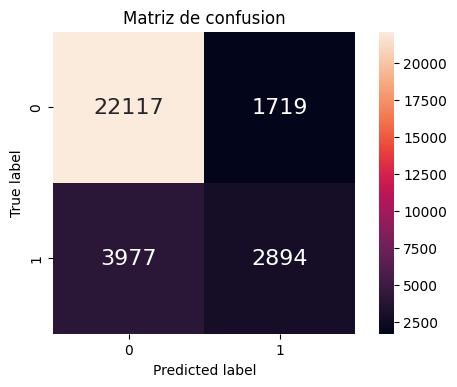

In [13]:
plot_confusion_matrix(resultados_val, y_pred)

In [14]:
print(classification_report(resultados_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     23836
           1       0.63      0.42      0.50      6871

    accuracy                           0.81     30707
   macro avg       0.74      0.67      0.69     30707
weighted avg       0.80      0.81      0.80     30707



In [14]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(15, 10))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

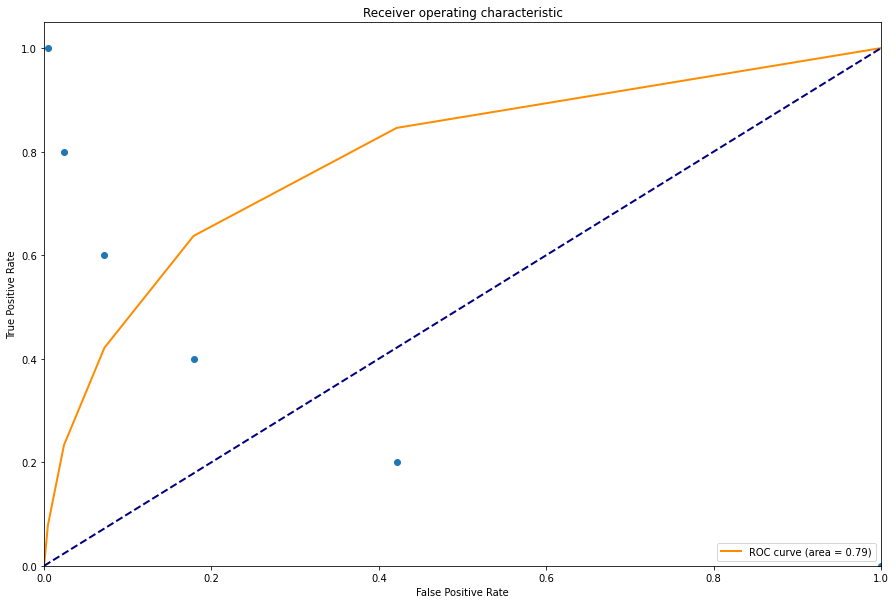

0.7893968741281598

In [16]:
fpr, tpr, thresholds = roc_curve(resultados_val, knn.predict_proba(datos_val)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val, knn.predict_proba(datos_val)[:, 1]))

Dado que KNN es costoso de entranar cuando se tiene una alta dimensionalidad, trataremos de reducirlo utilizando algun feature selection de sklearn.

# Reduccion de dimensionalidad

Ahora reducimos la dimensionalidad usando forward selection.

In [17]:
knn = KNeighborsClassifier(n_neighbors=7) # Cantidad de vecinos calculados utilizando random search con el dataset entero
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(datos_training_knn, resultados_training_knn.values.ravel())

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=7),
                          n_features_to_select=10)

In [18]:
sfs.get_support()

array([False,  True,  True, False, False, False,  True, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False, False])

In [6]:
from preprocessing import preprocessing_knn
datos_training_reduced, datos_val_reduced = preprocessing_knn(X_training.copy(), X_val_dev.copy())

/home/franco/.local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [7]:
pd.DataFrame(datos_training_reduced)

,0,1,2,3,4,5,6,7,8,9
0,0.455847,0.604759,0.665601,0.164062,0.448276,0.536807,0.555556,0.222222,0.6,0.454545
1,0.453346,0.632550,0.446400,0.507812,0.726054,0.864317,0.555556,0.222222,0.8,0.909091
2,0.520792,0.715923,0.507200,0.218750,0.712644,0.810512,0.777778,0.333333,0.4,0.909091
3,0.594826,0.632550,0.491200,0.250000,0.660920,0.801154,0.222222,0.222222,0.5,0.090909
4,0.390351,0.623286,0.632000,0.179688,0.323755,0.333282,0.777778,0.333333,0.1,0.454545
...,...,...,...,...,...,...,...,...,...,...
71644,0.694253,0.363902,0.656000,0.218750,0.727969,0.599969,0.888889,0.444444,0.3,0.000000
71645,0.645823,0.475067,0.611200,0.203125,0.392720,0.305210,0.888889,0.555556,0.2,0.636364
71646,0.217282,0.669605,0.696000,0.406250,0.319923,0.506395,0.444444,0.555556,0.1,0.454545
71647,0.618690,0.373166,0.593601,0.695312,0.507663,0.553182,0.555556,0.222222,0.6,0.545455


Obtenemos que los features mas importantes son: horas_de_sol, humedad_tarde, nubosidad_tarde, presion_atmosferica_tarde, presion_atmosferica_temprano, rafaga_viento_max_velocidad, barrio_0, barrio_1, barrio_2 y mes.

# Busqueda de hiperparametros

Ahora volvemos a buscar la mejor cantidad de vecinos usando random search.

In [21]:
params = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform', 'distance']}

clf_knn = KNeighborsClassifier()

rgscv = RandomizedSearchCV(
    clf_knn, params, n_iter=8, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True, random_state=117
).fit(datos_training_reduced, resultados_training_knn.values.ravel())
print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.8460054235700933
Best params {'weights': 'distance', 'n_neighbors': 7}


Una vez obtenidos los parametros, entrenamos el modelo y realizamos las predicciones.

In [10]:
clf_knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
clf_knn.fit(datos_training_reduced, resultados_training_knn.values.ravel())

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
y_pred_knn = clf_knn.predict(datos_val_reduced)

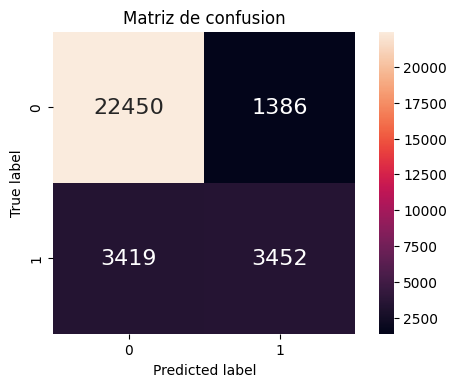

In [25]:
plot_confusion_matrix(resultados_val, y_pred_knn)

In [26]:
print(classification_report(resultados_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     23836
           1       0.71      0.50      0.59      6871

    accuracy                           0.84     30707
   macro avg       0.79      0.72      0.75     30707
weighted avg       0.83      0.84      0.83     30707



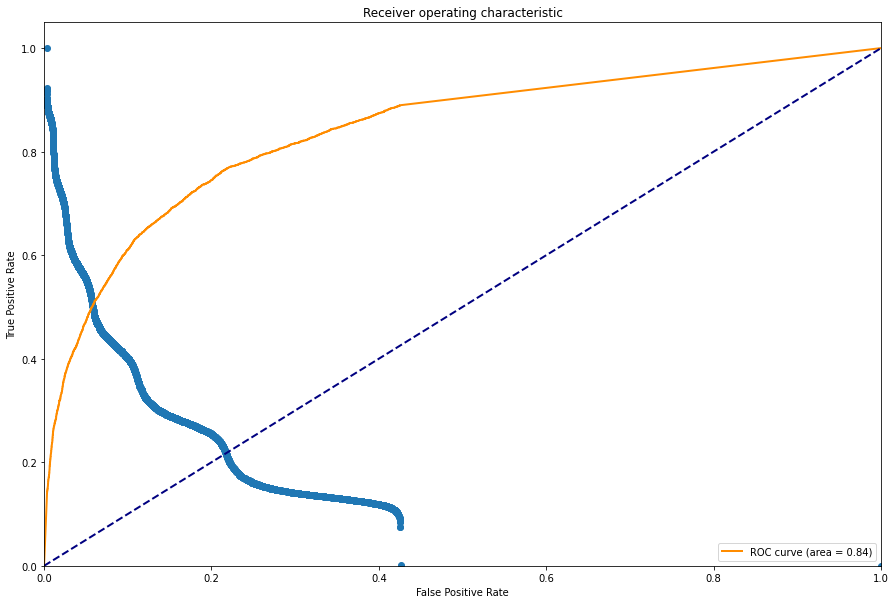

0.8409140893861901

In [27]:
fpr, tpr, thresholds = roc_curve(resultados_val, clf_knn.predict_proba(datos_val_reduced)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_val, clf_knn.predict_proba(datos_val_reduced)[:, 1]))

Se obtienen resultados mejores que con los parametros anteriores, por lo tanto utilizaremos este modelo para la prediccion final.

# Predicciones sobre el test-holdout

In [8]:
_datos_training, datos_test = preprocessing_knn(X_training.copy(), X_test_holdout.copy())

y_test = y_test_holdout.reset_index()
y_test = y_test.drop(columns=['index'])
resultados_test = pd.get_dummies(y_test, drop_first=True, columns=['llovieron_hamburguesas_al_dia_siguiente'])

pd.DataFrame(datos_test)

/home/franco/.local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0.351123,0.697396,0.734400,0.203125,0.312261,0.438554,0.666667,0.333333,0.2,0.363636
1,0.654050,0.345375,0.644801,0.187500,0.488506,0.335622,0.666667,0.333333,0.2,0.818182
2,0.838755,0.512122,0.561601,0.187500,0.545977,0.553182,0.777778,0.777778,0.5,1.000000
3,0.771309,0.345375,0.553601,0.203125,0.701149,0.700562,0.777778,0.333333,0.2,0.090909
4,0.617145,0.493594,0.721601,0.164062,0.494253,0.483001,0.777778,0.333333,0.1,0.090909
...,...,...,...,...,...,...,...,...,...,...
11368,0.688826,0.354639,0.731200,0.187500,0.555556,0.461947,0.777778,0.666667,0.2,0.454545
11369,0.223518,0.928989,0.414400,0.484375,0.352490,0.447911,0.777778,0.888889,0.5,0.454545
11370,0.173924,0.651077,0.619200,0.132812,0.482759,0.553182,0.777778,0.333333,0.6,0.727273
11371,0.578604,0.595495,0.750400,0.132812,0.465517,0.475983,0.777778,0.333333,0.6,0.363636


In [11]:
y_pred = clf_knn.predict(datos_test)

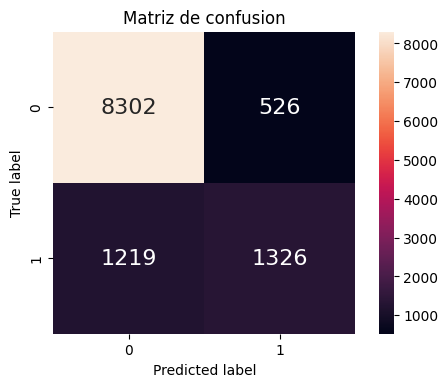

In [15]:
plot_confusion_matrix(resultados_test, y_pred)

In [16]:
print(classification_report(resultados_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8828
           1       0.72      0.52      0.60      2545

    accuracy                           0.85     11373
   macro avg       0.79      0.73      0.75     11373
weighted avg       0.84      0.85      0.84     11373



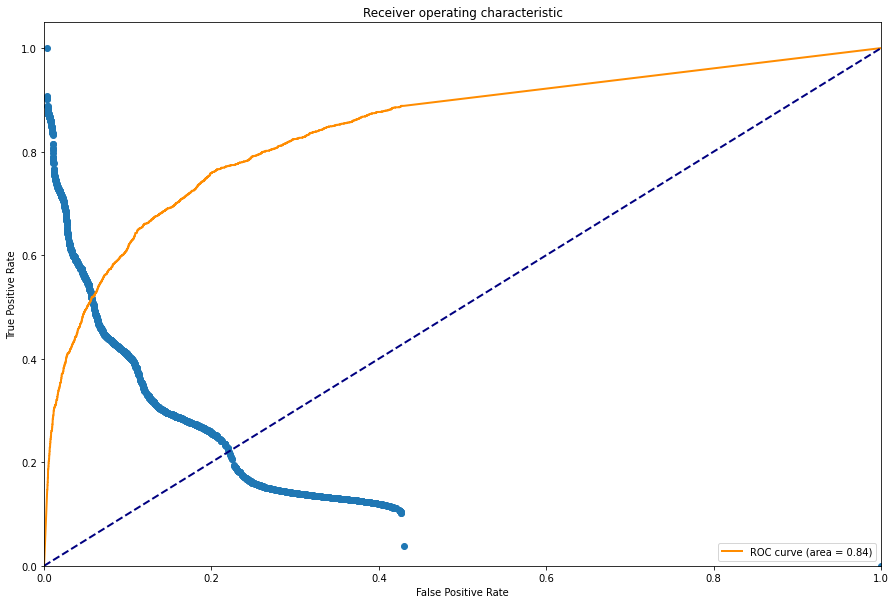

0.8438988332355613

In [17]:
fpr, tpr, thresholds = roc_curve(resultados_test, clf_knn.predict_proba(datos_test)[:, 1])

plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(resultados_test, clf_knn.predict_proba(datos_test)[:, 1]))

# Prediccion final

In [18]:
datos_prediccion = pd.read_csv(
    'https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8/export?format=csv', low_memory=False
)
datos_prediccion

,barrio,dia,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,id,llovieron_hamburguesas_hoy,mm_evaporados_agua,...,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_direccion,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano
0,Villa General Mitre,2014-12-16,Oestesuroeste,Sursureste,13.4,38.0,51.0,116706,NaN,NaN,...,1010.9,1014.4,suroeste,41.0,26.8,8.9,24.9,20.6,28.0,13.0
1,Nueva Pompeya,2010-10-21,Nornoreste,Estesureste,NaN,39.0,57.0,58831,no,NaN,...,1020.2,1023.8,Norte,28.0,23.3,5.0,21.5,14.7,11.0,6.0
2,Constitución,2013-04-09,Estesureste,Oestenoroeste,3.6,73.0,90.0,31981,si,2.4,...,1024.3,1026.7,Oestenoroeste,24.0,22.0,15.6,20.7,16.7,6.0,15.0
3,Agronomía,2016-02-05,Sureste,Sureste,NaN,34.0,47.0,2533,no,NaN,...,1015.8,1018.3,Sureste,30.0,29.9,14.2,27.0,20.0,11.0,15.0
4,Balvanera,2012-06-05,suroeste,Noroeste,NaN,77.0,87.0,7270,no,2.0,...,1007.6,1006.0,suroeste,39.0,11.5,5.5,11.2,7.0,20.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,Parque Chas,2013-04-24,suroeste,Oestenoroeste,NaN,71.0,77.0,73456,no,NaN,...,1018.9,1021.2,Oeste,37.0,19.8,9.8,17.3,12.8,9.0,13.0
29088,Belgrano,2015-10-30,Norte,Noreste,NaN,37.0,64.0,14471,no,NaN,...,1017.9,1021.8,Nornoreste,41.0,29.3,15.6,27.8,20.2,15.0,28.0
29089,Villa Crespo,2011-08-09,Nornoreste,Norte,10.1,31.0,77.0,106482,no,3.2,...,1011.1,1016.3,suroeste,41.0,19.8,5.5,18.6,11.1,20.0,11.0
29090,Caballito,2017-04-25,Nornoreste,Norte,NaN,81.0,90.0,21057,no,NaN,...,1008.2,1014.6,Nornoreste,39.0,25.4,17.8,22.0,19.5,33.0,15.0


In [19]:
_datos_training, X = preprocessing_knn(X_training.copy(), datos_prediccion.copy())
predicciones = clf_knn.predict(X)

predicciones = pd.DataFrame(predicciones).rename(columns= {0:'llovieron_hamburguesas_al_dia_siguiente'})
predicciones.replace(0, 'no', inplace= True)
predicciones.replace(1, 'si', inplace= True)
predicciones

/home/franco/.local/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,llovieron_hamburguesas_al_dia_siguiente
0,no
1,no
2,no
3,no
4,si
...,...
29087,no
29088,no
29089,no
29090,no


In [20]:
predicciones.to_csv("KNN.csv")